<a href="https://colab.research.google.com/github/obi1204/Python-Courses-and-Projects/blob/main/NYC_311_Customer_Service_Requests_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
NYC311 = pd.read_csv("NYC311data.csv")
NYC311.info()

<ipython-input-3-69a98ed57257>:1: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  NYC311 = pd.read_csv("NYC311data.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [ ]:
NYC311 = pd.read_csv("NYC311data.csv")
NYC311.info()

<ipython-input-3-69a98ed57257>:1: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  NYC311 = pd.read_csv("NYC311data.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [8]:
dropcolumns = ["Latitude", "Ferry Terminal Name", "Ferry Direction", "Garage Lot Name", "Bridge Highway Segment","Road Ramp","Bridge Highway Direction","Bridge Highway Name","Taxi Pick Up Location","Vehicle Type","School Not Found","School Zip","School State","School City","School Address","School Phone Number","School Code",
               "School Region","School Number","School Name"]

NYC311 = NYC311.drop(columns=dropcolumns)

In [12]:
dropcolumns2 = ["Unique Key", "X Coordinate (State Plane)", "Y Coordinate (State Plane)"]
NYC311 = NYC311.drop(columns=dropcolumns2)

In [15]:
dropcolumns3 = ["Resolution Description", "Incident Address", "Intersection Street 1", "Intersection Street 2", "Taxi Company Borough", "Cross Street 1","Cross Street 2", "Intersection Street 2"]

NYC311 = NYC311.drop(columns = dropcolumns3)

NYC311

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Street Name,Address Type,...,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,Park Facility Name,Park Borough,School or Citywide Complaint,Longitude,Location
0,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,VERMILYEA AVENUE,ADDRESS,...,Closed,01-01-16 7:59,01-01-16 0:55,12 MANHATTAN,MANHATTAN,Unspecified,MANHATTAN,NaN,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,23 AVENUE,ADDRESS,...,Closed,01-01-16 7:59,01-01-16 1:26,01 QUEENS,QUEENS,Unspecified,QUEENS,NaN,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,VALENTINE AVENUE,ADDRESS,...,Closed,01-01-16 7:59,01-01-16 4:51,07 BRONX,BRONX,Unspecified,BRONX,NaN,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,BAISLEY AVENUE,ADDRESS,...,Closed,01-01-16 7:57,01-01-16 7:43,10 BRONX,BRONX,Unspecified,BRONX,NaN,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,57 ROAD,ADDRESS,...,Closed,01-01-16 7:56,01-01-16 3:24,04 QUEENS,QUEENS,Unspecified,QUEENS,NaN,-73.874170,"(40.733059618956815, -73.87416975810375)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300693,03/29/2015 12:33:41 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,CRESCENT AVENUE,NaN,...,Open,03/29/2015 08:33:41 AM,NaN,0 Unspecified,Unspecified,Unspecified,Unspecified,NaN,NaN,NaN
300694,03/29/2015 12:33:28 AM,03/29/2015 02:33:59 AM,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,87 AVENUE,ADDRESS,...,Closed,03/29/2015 08:33:28 AM,03/29/2015 02:33:59 AM,09 QUEENS,QUEENS,Unspecified,QUEENS,NaN,-73.846087,"(40.69407728322387, -73.8460866160573)"
300695,03/29/2015 12:33:03 AM,03/29/2015 03:40:20 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,THROOP AVENUE,ADDRESS,...,Closed,03/29/2015 08:33:03 AM,03/29/2015 03:40:20 AM,03 BROOKLYN,BROOKLYN,Unspecified,BROOKLYN,NaN,-73.944234,"(40.69959035300927, -73.94423377144169)"
300696,03/29/2015 12:33:02 AM,03/29/2015 04:38:35 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,EAST TREMONT AVENUE,ADDRESS,...,Closed,03/29/2015 08:33:02 AM,03/29/2015 04:38:35 AM,10 BRONX,BRONX,Unspecified,BRONX,NaN,-73.834587,"(40.8377075854206, -73.83458731019586)"


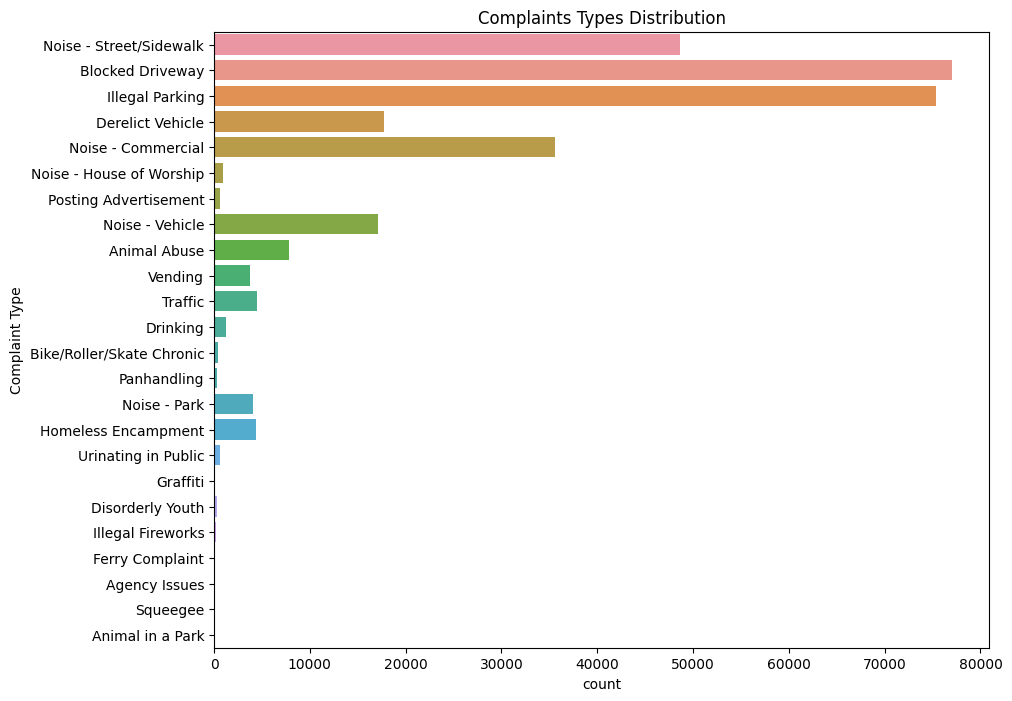

In [17]:
plt.figure(figsize=(10,8))
plt.title('Complaints Types Distribution')
sns.countplot(y='Complaint Type', data=NYC311)
plt.show()

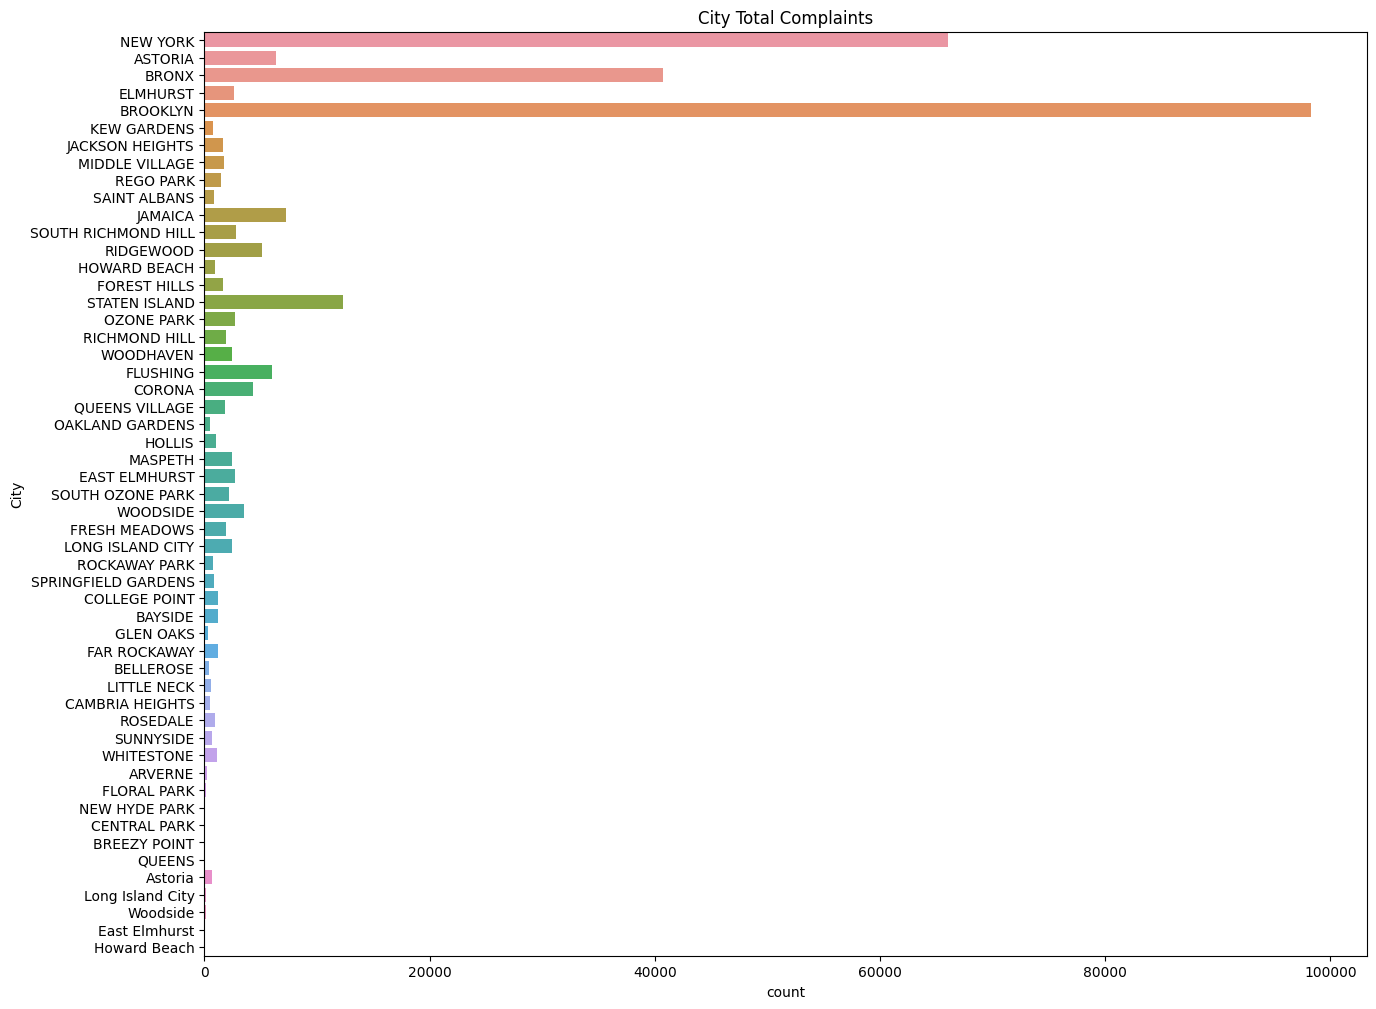

In [45]:
plt.figure(figsize=(15,12))
plt.title('City Total Complaints')
sns.countplot(y='City',data=NYC311)
plt.show()

In [46]:
topLocation = NYC311.sort_values(by=['Location Type'])

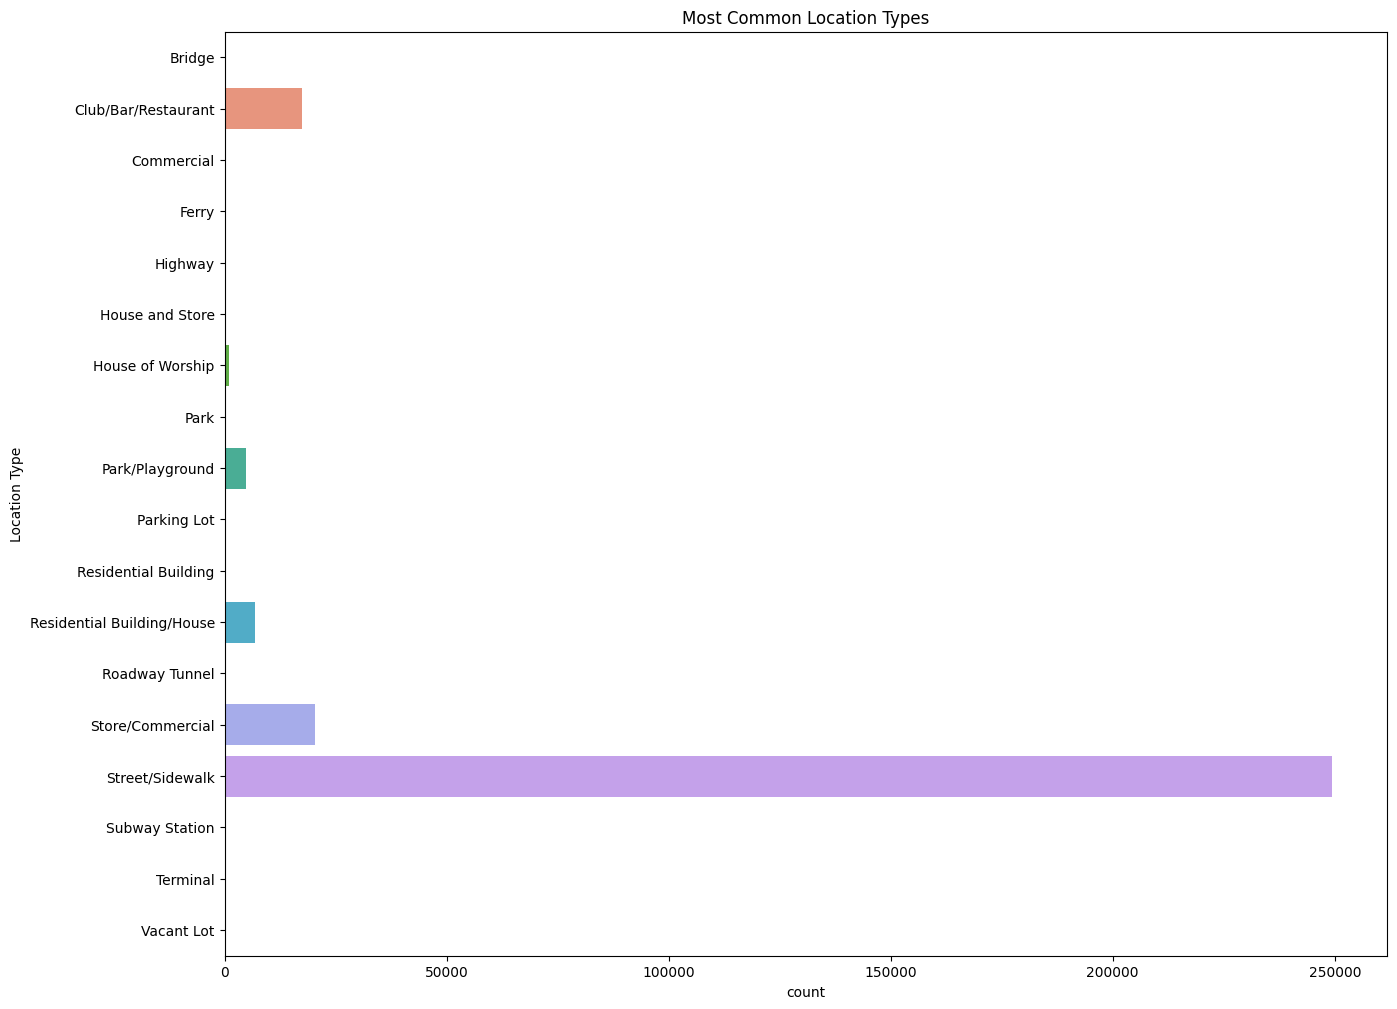

In [43]:
plt.figure(figsize=(15,12))
plt.title('Most Common Location Types')
sns.countplot(y='Location Type',data=topLocation)
plt.show()

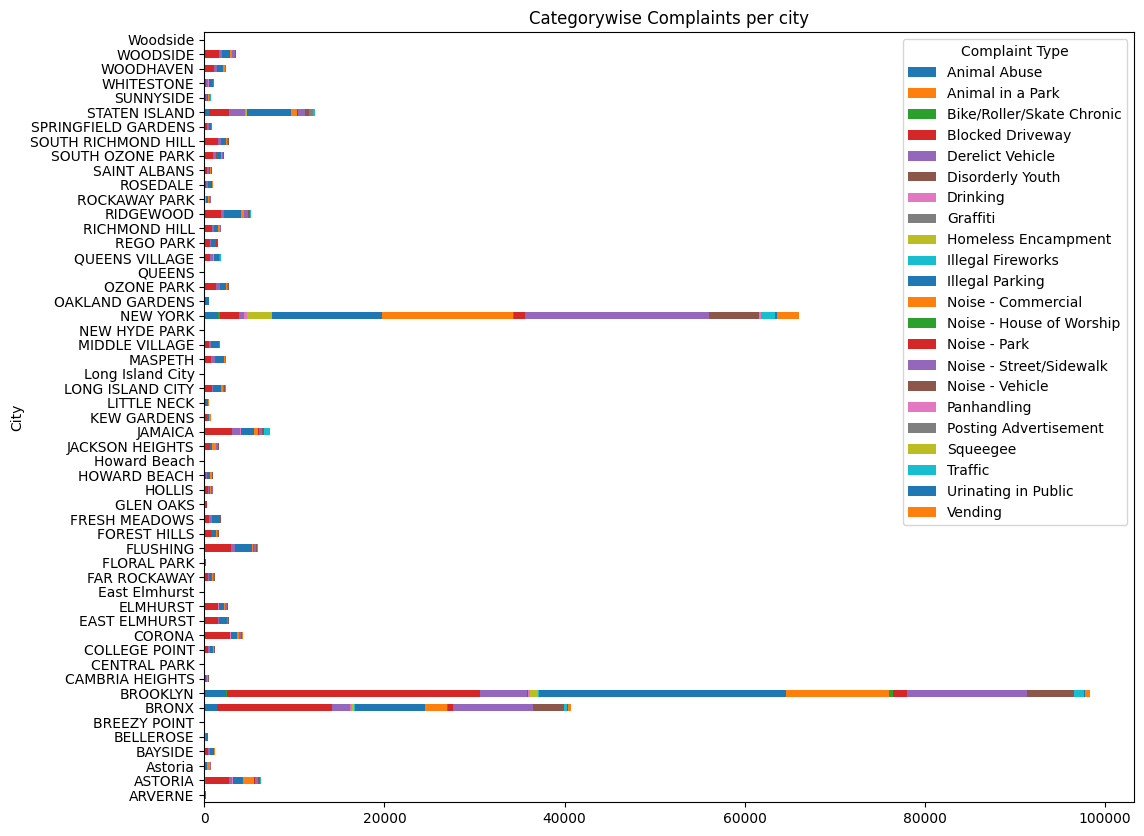

In [44]:
top = pd.crosstab(topLocation['City'], topLocation['Complaint Type'])

top.plot(kind='barh',stacked=True,figsize=(12,10))
plt.title('Categorywise Complaints per city')
plt.show()